# Modeling

In this notebook we
1. Load '../Data/tweets_eda.pickle' which is the output of exploratory data analysis.
2. Apply VADER for sentiment analysis to generate labels.
3. Apply LSTM, mLSTM, CNN & TCN models to predict sentiment with labels generated by VADER, on both word-level texts and character-level texts.
4. Inpect results and tune model(s) further.
5. Compare models & come to the conclusion.

### Import Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 8)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_pickle('../Data/tweets_eda.pickle')
df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,Tweets_tokens_remove_special_chars_remove_stop_words_len,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",5,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448}


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 19 columns):
index                                                                       7628 non-null int64
Tweets                                                                      7628 non-null object
Has_predefined_movies                                                       7628 non-null object
Tweets_tokens                                                               7628 non-null object
Tweets_tokens_len                                                           7628 non-null int64
Tweets_tokens_remove_special_chars                                          7628 non-null object
Tweets_tokens_remove_special_chars_len                                      7628 non-null int64
Tweets_tokens_counter                                                       7628 non-null object
Tweets_tokens_counter_most_common                                           7628 non-null object
Tweets_tokens_remove_sp

There are 7628 data points.

### Prepare functions for Plotting

In [4]:
def get_sub_plot(width = 24, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_line_plot(data):
    ax = get_sub_plot()
    sns.lineplot(data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()
    
def plot_dist_plot(data):
    ax = get_sub_plot()
    sns.distplot(data, ax = ax)
    plt.show()
    
def plot_point_plot(x, y, data):
    ax = get_sub_plot()
    sns.pointplot(x = x, y = y, data = data, ax = ax)
    plt.xticks(rotation = 15)
    plt.show()

### Predict Sentiment using VADER to Generate Lables for other Modeling Algorithms

We use VADER, a popular sentiment analysis package, to get sentiment scores for each tweet.

Reference: [VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Nicole/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['Tweets'].apply(sid.polarity_scores)
df['compound_sentiment_scores'] = df['sentiment_scores'].apply(lambda x: x['compound'])

df.head(1)

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,Tweets_tokens_remove_special_chars_remove_stop_words_counter,Tweets_tokens_remove_special_chars_remove_stop_words_counter_most_common,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'tomorrow': 1}","[(Come, 1)]","{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0


We retrieved compound sentiment score for each tweet & stored in 'compound_sentiment_scores' column. Note that the score is a floating number ranging from -1.0 to 1.0. -1.0 means negative while 1.0 means positive. 0 means neutral.

### Randomly Pick tweets and check their Sentiment Scores

In [7]:
import random

def random_pick_tweet_and_inspect(df, max_pct, max_num):
    n_data = df.shape[0]
    n_picked = n_data * max_pct
    if n_picked > max_num:
        n_picked = max_num
    random_sample = random.sample(range(0, n_data), n_picked)
    return df.loc[random_sample, :][['Tweets', 'compound_sentiment_scores']]

random_pick_tweet_and_inspect(df, 0.05, 20)    

,Tweets,compound_sentiment_scores
4997,How dare you @SYFY edit #thelostworld and ruin one of the best film transitions of all time #jurassicjune #jurassicworld #jurassicpark,0.1027
1267,Get ready. #Oceans8 is NOW PLAYING - #Celebr8The8 and get tickets:,0.6166
1184,first UK showing of #Oceans8 is actually packed: i love women supporting women,0.7964
3748,JURASSIC WORLD: FALLEN KINGDOM$854.5M Overseas Total / 69 Markets$1.26B Global Total #JurassicWorld #FallenKingdom #BoxOffice,-0.4995
4,crazy rich asians:— asian rep — AMAZING love story— HILARIOUS— moving— has gemma chan & constance wu— great soundtrack— a cute and lovely movie— nick young and rachel chu— astrid leongsierra burgess: is a loser,0.9609
780,R9 is coming #Oceans8 #TheActionMovie #PCAs,0.0000
3168,"Opinion: ""Crazy Rich Asians"" misses the big picture in Singapore — but it’s still a step forward",0.0387
2450,"Please vote for #PanelPicker ""Crazy Rich Wakanda"" today (voting closes end of August)! I'd be moderating a discussion of PoC audience movements like #BlackPantherChallenge and #CrazyRichAsians's #GoldOpen. Send me to my first #SXSW! Thank you!!!",0.8647
6057,I just wanna see American Animals,0.0000
2622,"I cannot stress how great Crazy Rich Asians is. The mind blowingly beautiful cast, THAT WEDDING SCENE, & also loved that they used Kina Grannis who started off as a YouTube artist in that gorgeous scene must see!",0.9236


Looking at the scores, VADER does a pretty good job.

### Plot Average / Minimum / Maximum Sentiment Scores for each Movie

In [8]:
# Collect average, min & max sentiment score for each movie.
df['Has_predefined_movies_strs'] = df['Has_predefined_movies'].apply(str)

df_avg_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['Has_predefined_movies', 'compound_sentiment_scores'].mean()).reset_index()
df_avg_movie_sentiment.columns = ['Has_predefined_movies_strs', 'ave_scores']
df_min_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].min()).reset_index()
df_min_movie_sentiment.columns = ['Has_predefined_movies_strs', 'min_scores']
df_max_movie_sentiment = pd.DataFrame(df.groupby('Has_predefined_movies_strs')['compound_sentiment_scores'].max()).reset_index()
df_max_movie_sentiment.columns = ['Has_predefined_movies_strs', 'max_scores']

print(df_avg_movie_sentiment.head())
print(df_min_movie_sentiment.head())
print(df_max_movie_sentiment.head())

                 Has_predefined_movies_strs  ave_scores
0                    ['adrift', 'bookclub']    0.040460
1               ['adrift', 'jurassicworld']    0.000000
2                                ['adrift']    0.119587
3  ['americananimals', 'missionimpossible']   -0.510600
4                       ['americananimals']    0.275057
                 Has_predefined_movies_strs  min_scores
0                    ['adrift', 'bookclub']      0.0000
1               ['adrift', 'jurassicworld']      0.0000
2                                ['adrift']     -0.7443
3  ['americananimals', 'missionimpossible']     -0.5106
4                       ['americananimals']     -0.8748
                 Has_predefined_movies_strs  max_scores
0                    ['adrift', 'bookclub']      0.2023
1               ['adrift', 'jurassicworld']      0.0000
2                                ['adrift']      0.9749
3  ['americananimals', 'missionimpossible']     -0.5106
4                       ['americananimals']     

In [9]:
# Join the 3 dataFrame into one.
df_movie_sentiment = df_avg_movie_sentiment.merge(df_min_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')
df_movie_sentiment = df_movie_sentiment.merge(df_max_movie_sentiment, on = 'Has_predefined_movies_strs', how = 'outer')

# Keep rows where only one movie is present.
mask = df_movie_sentiment.Has_predefined_movies_strs.str.contains(',')
df_movie_sentiment = df_movie_sentiment.loc[~mask, :]
df_movie_sentiment['movie'] = df_movie_sentiment['Has_predefined_movies_strs'].apply(lambda x: x[2:-2])
df_movie_sentiment.head(20)

,Has_predefined_movies_strs,ave_scores,min_scores,max_scores,movie
2,['adrift'],0.119587,-0.7443,0.9749,adrift
4,['americananimals'],0.275057,-0.8748,0.9595,americananimals
7,['bookclub'],0.314703,-0.9735,0.9835,bookclub
12,['crazyrichasians'],0.389219,-0.9460,0.9900,crazyrichasians
26,['incredibles2'],0.265126,-0.9033,0.9775,incredibles2
28,['inthefade'],0.243986,-0.8979,0.9337,inthefade
33,['jurassicworld'],0.217215,-0.9451,0.9774,jurassicworld
40,['mammamia'],0.216199,-0.7543,0.9469,mammamia
41,['missionimpossible'],0.152282,-0.9136,0.9618,missionimpossible
44,['oceans8'],0.193227,-0.9446,0.9860,oceans8


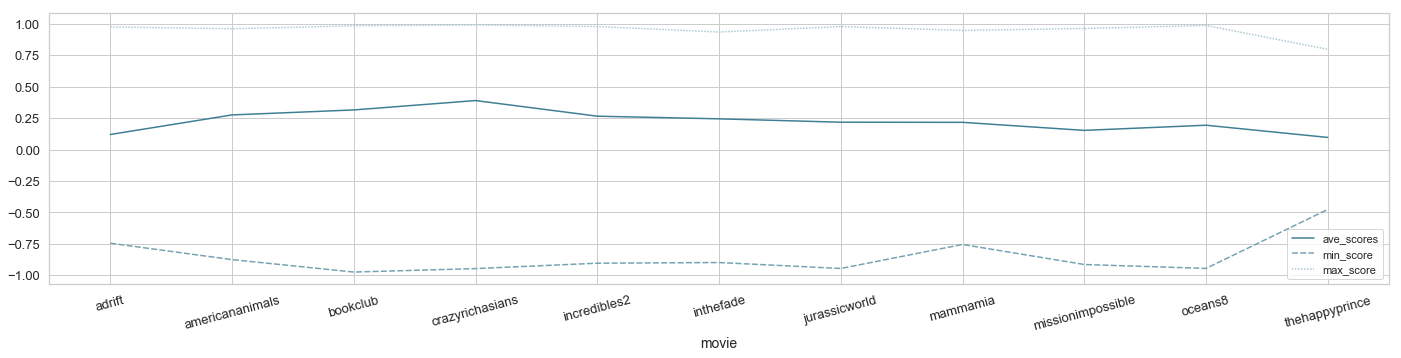

In [10]:
# Get dataframe for plotting scores for each movie.
index = df_movie_sentiment['movie']
data = []
for i, row in df_movie_sentiment.iterrows():
    data.append([row['ave_scores'], row['min_scores'], row['max_scores']])
df_movie_sentiment_plot = pd.DataFrame(data, index, ['ave_scores', 'min_score', 'max_score'])

plot_line_plot(df_movie_sentiment_plot)

Based on the above plot,
1. Crazy rich asians has the highest average sentiment score.
2. The Bookclub has the lowest minimum sentiment score.
3. Most of the movies has at least one pretty high score while crazy rich asians still has the highest maximum score.
4. Interestingly The Happy Prince has the lowest maximum score and highest minimum score.

### Top Positive, Neutral and Negative Words in Tweets

With the sentiment scores generated by VADER, we can also quickly explore what are the top positive, neutral and negative words in tweets.

In [11]:
# TODO

### Top Words used to Describe Different Emotions

We can also analyze which are the top words used to describe different emotions.

In [12]:
# TODO

Up until now we directly inspect & utilize sentiment socres from VADER.

However as we want to classify the sentiment into 5 groups, negative, somewhat negative, neutral, somewhat positive & positive, let's see the histogram of scores and see if there's any intuitive way to group them.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


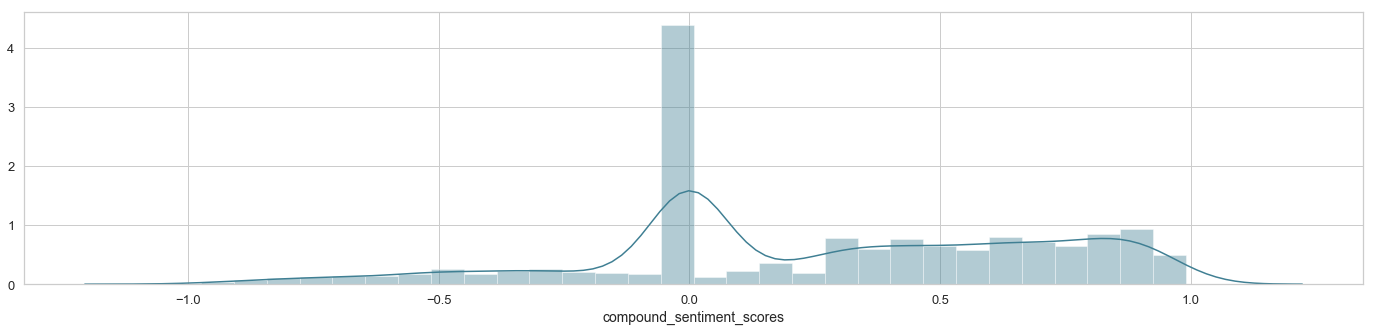

In [13]:
plot_dist_plot(df['compound_sentiment_scores'])

Looking at the above histogram, there are a lot of scores closed to 0, which apparently can be classified as 'neutral'.

Intuitively, we classify them into 5 groups using three threshold -0.5, 0 & 0.5. The groups are, negative, somewhat negative, neutral, somewhat positve & positive.

In [14]:
def apply_sentiment_class(x):
    if x == 0:
        return 'neutral'
    elif x > 0 and x <= 0.5:
        return 'somewhat positive'
    elif x > 0.5 and x <= 1:
        return 'positive'
    elif x < 0 and x >= -0.5:
        return 'somewhat negative'
    else:
        return 'negative'
    
df['semtiment_class'] = df['compound_sentiment_scores'].apply(apply_sentiment_class)

df.head(1)

,index,Tweets,Has_predefined_movies,Tweets_tokens,Tweets_tokens_len,Tweets_tokens_remove_special_chars,Tweets_tokens_remove_special_chars_len,Tweets_tokens_counter,Tweets_tokens_counter_most_common,Tweets_tokens_remove_special_chars_remove_stop_words,...,TF_IDF_score,TF_IDF_score_highest,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized,Tweets_tokens_remove_special_chars_remove_stop_words_lemmatized_len,TF_IDF_score_lemmatized,TF_IDF_score_lemmatized_highest,sentiment_scores,compound_sentiment_scores,Has_predefined_movies_strs,semtiment_class
0,299,Come. To. Mama. Own #Oceans8 on Blu-ray™ tomorrow.,[oceans8],"[Come, ., To, ., Mama, ., Own, #, Oceans8, on, Blu-ray™, tomorrow, .]",13,"[Come, To, Mama, Own, on, tomorrow]",6,"{'Come': 1, 'To': 1, 'Mama': 1, 'Own': 1, 'on': 1, 'tomorrow': 1}","[(Come, 1)]","[Come, To, Mama, Own, tomorrow]",...,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"[Come, To, Mama, Own, tomorrow]",5,"{'Come': 0.4467500469174201, 'Mama': 0.5813888196920448, 'Own': 0.465617523288586, 'To': 0.3417364557300077, 'tomorrow': 0.35891217971541406}",{'Mama': 0.5813888196920448},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0,['oceans8'],neutral


The lables are now saved in 'semtiment_class' column.

With the label generated using VADER. We can use them to train our own models with supervised learning.

### Prepare functions for Preprocessing Features

As we would like to predict sentiment with tweets. Our features would be tweets and target would be sentiment labels we acquired using VADER.

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

max_fatures = 2000

# Let's tranform all tweets, the feature, to lower case first.
df['Tweets_lower'] = df['Tweets'].apply(lambda x: x.lower())

# and also encode sentiment class, our target
label_encoder = LabelEncoder()
df['semtiment_class_encoded'] = label_encoder.fit_transform(df['semtiment_class'])

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
# define feature & target
features = 'Tweets_lower'
target = 'semtiment_class_encoded'

In [17]:
def get_word_level_X(df, features):
    tokenizer = Tokenizer(num_words = max_fatures, split = ' ')
    tokenizer.fit_on_texts(df[features].values)

    X = tokenizer.texts_to_sequences(df[features].values)
    X = pad_sequences(X)
    
    print('Shape of X: ', X.shape)
    
    return X

def get_character_level_X(df, features):
    X = df[features].values
    X = char_arrs = [[c for c in x] for x in X]
    
    tokenizer = Tokenizer(char_level = True)
    tokenizer.fit_on_texts(char_arrs)
    
    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X)
    
    print('Shape of X: ', X.shape)
    
    return X

def get_y(df, target):
    y = to_categorical(df[target])
    
    print('Shape of y: ', y.shape)
    
    return y

### Prepare functions for Scoring & Reporting

As the problem is a text classification problem and we report confusion matrix for each model.

In [18]:
from numpy import argmax
from sklearn.metrics import confusion_matrix

def score_and_report(X_test, y_test, y_pred, model, batch_size):
    score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size = batch_size)
    print("score: %.2f" % (score))
    print("acc: %.2f" % (acc))

    y_test_decoded = [argmax(y_test[i]) for i in range(y_test.shape[0])]    

    print(confusion_matrix(y_test_decoded, y_pred))
    
    return (score, acc)

### Prepare functions for Modeling

#### We will first try the following models:
1. Long Short-Term Memory (LSTM)
2. Multiplicative Long-Short Term Memory (mLSTM)
3. Convolutional Neural Network (CNN)
4. Temporal Convolutional Network (TCN)

#### References:
1. mLSTM:
 * Paper: [Learning to Generate Reviews and Discovering Sentiment](https://arxiv.org/pdf/1704.01444.pdf)
 * Paper: [MULTIPLICATIVE LSTM FOR SEQUENCE MODELLING](https://arxiv.org/pdf/1609.07959.pdf)
 * Code: https://github.com/titu1994/Keras-Multiplicative-LSTM
2. TCN:
 * Paper: [An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling](https://arxiv.org/pdf/1803.01271.pdf)
 * Code: https://github.com/philipperemy/keras-tcn

#### Train-Test-Split
And use train_test_split to do train-test split.

TODO: Cross validation?

In [19]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Input

from keras.layers import LSTM, SpatialDropout1D
from multiplicative_lstm import MultiplicativeLSTM
from keras.layers import Convolution1D, Flatten, Dropout
from tcn import TCN

TextModes = ['WORD', 'CHAR']
Models = ['LSTM', 'mLSTM', 'CNN', 'TCN']

def model_lstm_mlstm_cnn_tcn(model_mode, text_mode, data, features, target):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return
    
    # preprocess data
    if text_mode == 'WORD':
        X = get_word_level_X(data, features)
    elif text_mode == 'CHAR':
        X = get_character_level_X(df, features)
    
    y = get_y(data, target)

    embed_dim = 128
    
    if model_mode == 'LSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(SpatialDropout1D(0.4))
        model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'mLSTM':
        lstm_out = 196
        
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(SpatialDropout1D(0.4))
        model.add(MultiplicativeLSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'CNN':
        model = Sequential()
        model.add(Embedding(max_fatures, embed_dim, input_length = X.shape[1]))
        model.add(Convolution1D(64, 3, border_mode = 'same'))
        model.add(Convolution1D(32, 3, border_mode = 'same'))
        model.add(Convolution1D(16, 3, border_mode = 'same'))
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(180, activation = 'sigmoid'))
        model.add(Dropout(0.4))
        model.add(Dense(5, activation = 'softmax'))
    elif model_mode == 'TCN':
        i = Input(shape = (X.shape[1], ))
        o = Embedding(max_fatures, embed_dim, input_length = X.shape[1])(i)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_1')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_2')(o)
        o = TCN(return_sequences = False, dropout_rate = 0.4, name = 'TCN_3')(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        o = Dense(5, activation = 'softmax')(o)
        model = Model(inputs=[i], outputs=[o])
            
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    if model_mode == 'TCN':
        y_pred_prob = model.predict(X_test)    
        y_pred = [argmax(y_pred_prob[i]) for i in range(y_pred_prob.shape[0])]
    else:
        y_pred = model.predict_classes(X_test)
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

def try_all_modes(data, features, target, model_func):
    scores, accs = {}, {}
    for t in TextModes:
        for m in Models:
            score, acc = model_func(model_mode = m, text_mode = t, data = df, features = features, target = target)
            scores[(t, m)] = score
            accs[(t, m)] = acc
    return (scores, accs)

### Modeling

Let's try both word-level and character-level on LSTM, mLSTM, CNN & TCN.

In [20]:
scores, accs = try_all_modes(data = df, features = features, target = target, model_func = model_lstm_mlstm_cnn_tcn)

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 52, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 52, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
 - 17s - loss: 1.3404 - acc: 0.4620
Epoch 2/10
 - 15s - loss: 1.0454 - acc: 0.5975
Epoch 3/10
 - 15s - loss: 0.8488 - acc: 0.6937
Epoch 4/10
 - 16s - loss: 0.7248 - acc: 0.7450
Epoch

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 3, padding="same")`
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 3, padding="same")`


Epoch 1/10
 - 4s - loss: 1.3746 - acc: 0.4413
Epoch 2/10
 - 3s - loss: 1.0793 - acc: 0.5894
Epoch 3/10
 - 3s - loss: 0.9049 - acc: 0.6618
Epoch 4/10
 - 3s - loss: 0.7178 - acc: 0.7368
Epoch 5/10
 - 3s - loss: 0.5986 - acc: 0.7896
Epoch 6/10
 - 3s - loss: 0.4807 - acc: 0.8327
Epoch 7/10
 - 3s - loss: 0.3596 - acc: 0.8771
Epoch 8/10
 - 3s - loss: 0.2881 - acc: 0.9047
Epoch 9/10
 - 3s - loss: 0.2306 - acc: 0.9258
Epoch 10/10
 - 3s - loss: 0.2020 - acc: 0.9346
score: 1.85
acc: 0.59
[[ 34  28  19  28  19]
 [ 22 503  85  29  91]
 [ 14  37 688  25 111]
 [ 32  64  52  64  33]
 [ 29  82 194  27 208]]
Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: TCN
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 52)           0                                            
___________________________________

Epoch 1/10
 - 39s - loss: 1.5654 - acc: 0.3037
Epoch 2/10
 - 34s - loss: 1.4955 - acc: 0.3209
Epoch 3/10
 - 34s - loss: 1.3920 - acc: 0.4409
Epoch 4/10
 - 34s - loss: 1.2889 - acc: 0.5068
Epoch 5/10
 - 34s - loss: 1.1625 - acc: 0.5683
Epoch 6/10
 - 34s - loss: 1.0682 - acc: 0.6043
Epoch 7/10
 - 34s - loss: 1.0234 - acc: 0.6319
Epoch 8/10
 - 34s - loss: 0.9686 - acc: 0.6530
Epoch 9/10
 - 34s - loss: 0.9318 - acc: 0.6773
Epoch 10/10
 - 34s - loss: 0.8907 - acc: 0.6898
score: 1.07
acc: 0.63
[[  0  49  22   1  56]
 [  0 592  16   9 113]
 [  0  22 640   2 211]
 [  0  90  41   1 113]
 [  0  73 120   0 347]]
Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 338, 128)          256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 338, 128)          0

__________________________________________________________________________________________________
activation_26 (Activation)      (None, 338, 64)      0           TCN_1_dilated_conv_16_tanh_s0[0][
__________________________________________________________________________________________________
lambda_24 (Lambda)              (None, 338, 64)      0           activation_26[0][0]              
__________________________________________________________________________________________________
TCN_1_spatial_dropout1d_16_s0_0 (None, 338, 64)      0           lambda_24[0][0]                  
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 338, 64)      4160        TCN_1_spatial_dropout1d_16_s0_0.4
__________________________________________________________________________________________________
add_26 (Add)                    (None, 338, 64)      0           add_25[0][0]                     
          

Epoch 1/10
 - 212s - loss: 1.5728 - acc: 0.2986
Epoch 2/10
 - 2460s - loss: 1.5047 - acc: 0.3112
Epoch 3/10
 - 302s - loss: 1.4787 - acc: 0.3233
Epoch 4/10
 - 454s - loss: 1.4677 - acc: 0.3270
Epoch 5/10
 - 474s - loss: 1.4590 - acc: 0.3303
Epoch 6/10
 - 495s - loss: 1.4557 - acc: 0.3389
Epoch 7/10
 - 2213s - loss: 1.4558 - acc: 0.3436
Epoch 8/10
 - 317s - loss: 1.4524 - acc: 0.3460
Epoch 9/10
 - 312s - loss: 1.4537 - acc: 0.3505
Epoch 10/10
 - 436s - loss: 1.4501 - acc: 0.3479
score: 1.44
acc: 0.35
[[  0   0 128   0   0]
 [  0   0 730   0   0]
 [  0   0 875   0   0]
 [  0   0 245   0   0]
 [  0   0 540   0   0]]


In [21]:
def cmp_scores_and_accuracies(scores, accs):
    scoresDf = pd.DataFrame(list(scores.items()))
    scoresDf.columns = ['Modes', 'Score']
    accDf = pd.DataFrame(list(accs.items()))
    accDf.columns = ['Modes', 'Accuracy']
    
    print('Scores:')
    print(scoresDf.head(20))
    plot_point_plot(x = 'Modes', y = 'Score', data = scoresDf)
    
    print('Accuracies:')
    print(accDf.head(20))
    plot_point_plot(x = 'Modes', y = 'Accuracy', data = accDf)

Scores:
           Modes     Score
0   (WORD, LSTM)  1.227616
1  (WORD, mLSTM)  1.256858
2    (WORD, CNN)  1.849453
3    (WORD, TCN)  1.065303
4   (CHAR, LSTM)  1.335559
5  (CHAR, mLSTM)  1.327402
6    (CHAR, CNN)  1.488721
7    (CHAR, TCN)  1.441591


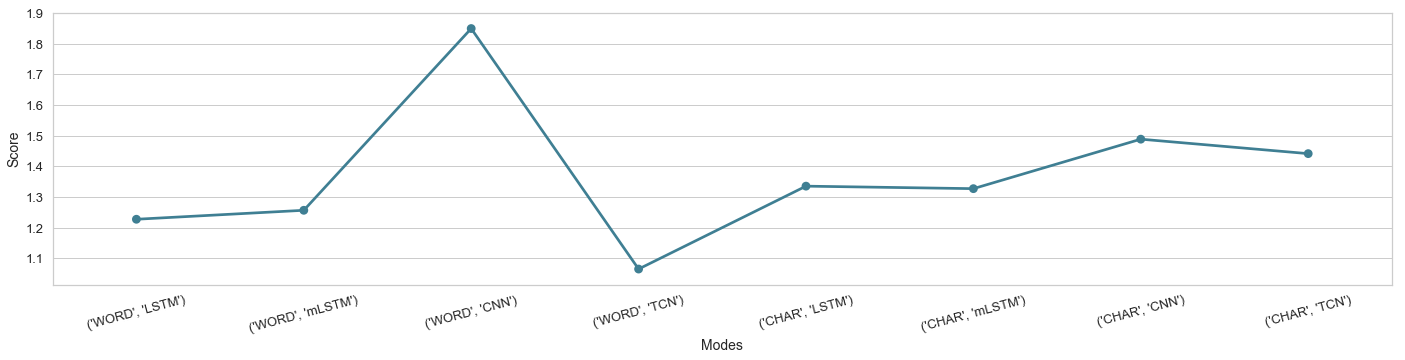

Accuracies:
           Modes  Accuracy
0   (WORD, LSTM)  0.652502
1  (WORD, mLSTM)  0.651311
2    (WORD, CNN)  0.594519
3    (WORD, TCN)  0.627482
4   (CHAR, LSTM)  0.472994
5  (CHAR, mLSTM)  0.474980
6    (CHAR, CNN)  0.465052
7    (CHAR, TCN)  0.347498


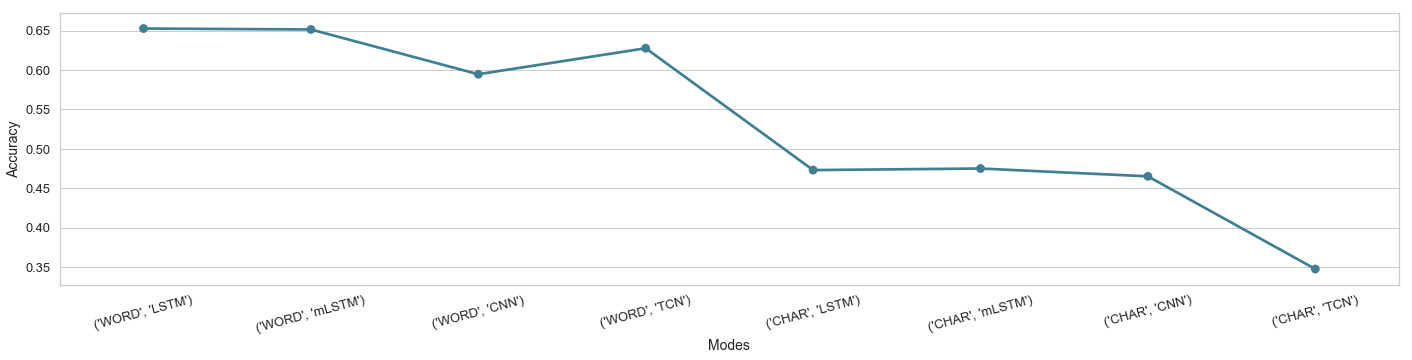

In [22]:
cmp_scores_and_accuracies(scores, accs)

According to the training process and scores/accuracy plots,
1. Word-level mLSTM has best accuracy.
2. In general word-level accuracies are better than character-level.
3. LSTM & mLSTM performs better than CNN & TCN.
4. For word-level modeling, TCN performs better than CNN.

However if we compare number of parameters, take word-level modeling for example, mLSTM has 318500 parameters while TCN has only 240064 parameters.

Let's try to tune TCN to see if it can get better accuracy.

In [23]:
Models = ['TCN_MORE_PARAM']

def model_tune_TCN(model_mode, text_mode, data, features, target):
    if model_mode not in Models:
        print('Model not defined')
        return
    
    if text_mode not in TextModes:
        print('Text mode not defined')
        return
    
    # preprocess data
    if text_mode == 'WORD':
        X = get_word_level_X(data, features)
    elif text_mode == 'CHAR':
        X = get_character_level_X(df, features)
    
    y = get_y(data, target)

    embed_dim = 128
    
    if model_mode == 'TCN_MORE_PARAM':
        i = Input(shape = (X.shape[1], ))
        o = Embedding(max_fatures, embed_dim, input_length = X.shape[1])(i)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_1')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_2')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_3')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_4')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_5')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_6')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_7')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_8')(o)
        o = TCN(return_sequences = True, dropout_rate = 0.4, name = 'TCN_9')(o)
        o = TCN(return_sequences = False, dropout_rate = 0.4, name = 'TCN_10')(o)
        o = Dropout(0.4)(o)
        o = Dense(180, activation = 'sigmoid')(o)
        o = Dropout(0.4)(o)
        o = Dense(5, activation = 'softmax')(o)
        model = Model(inputs=[i], outputs=[o])
        
    print('Text:', text_mode, 'Model:', model_mode)
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .33)
              
    batch_size = 32
    model.fit(X_train, y_train, epochs = 10, batch_size = batch_size, verbose = 2, shuffle = False)
    
    y_pred_prob = model.predict(X_test)    
    y_pred = [argmax(y_pred_prob[i]) for i in range(y_pred_prob.shape[0])]
    
    score, acc = score_and_report(X_test, y_test, y_pred, model, batch_size)
    
    return (score, acc)

In [24]:
scores_tune_tcn, accs_tune_tcn = try_all_modes(data = df, features = features, target = target, model_func = model_tune_TCN)

Shape of X:  (7628, 52)
Shape of y:  (7628, 5)
Text: WORD Model: TCN_MORE_PARAM
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 52)           0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 52, 128)      256000      input_3[0][0]                    
__________________________________________________________________________________________________
TCN_1_initial_conv (Conv1D)     (None, 52, 64)       8256        embedding_9[0][0]                
__________________________________________________________________________________________________
TCN_1_dilated_conv_1_tanh_s0 (C (None, 52, 64)       8256        TCN_1_initial_conv[0][0]         
_____________________________

activation_103 (Activation)     (None, 52, 64)       0           TCN_9_dilated_conv_16_tanh_s0[0][
__________________________________________________________________________________________________
lambda_91 (Lambda)              (None, 52, 64)       0           activation_103[0][0]             
__________________________________________________________________________________________________
TCN_9_spatial_dropout1d_16_s0_0 (None, 52, 64)       0           lambda_91[0][0]                  
__________________________________________________________________________________________________
conv1d_95 (Conv1D)              (None, 52, 64)       4160        TCN_9_spatial_dropout1d_16_s0_0.4
__________________________________________________________________________________________________
add_103 (Add)                   (None, 52, 64)       0           add_102[0][0]                    
                                                                 conv1d_95[0][0]                  
__________

Epoch 1/10
 - 291s - loss: 1.5699 - acc: 0.3039
Epoch 2/10
 - 7417s - loss: 1.5061 - acc: 0.3141
Epoch 3/10
 - 161s - loss: 1.4802 - acc: 0.3270
Epoch 4/10
 - 166s - loss: 1.4652 - acc: 0.3337
Epoch 5/10
 - 158s - loss: 1.4569 - acc: 0.3387
Epoch 6/10
 - 160s - loss: 1.4557 - acc: 0.3405
Epoch 7/10
 - 160s - loss: 1.4551 - acc: 0.3464
Epoch 8/10
 - 176s - loss: 1.4556 - acc: 0.3472
Epoch 9/10
 - 233s - loss: 1.4533 - acc: 0.3517
Epoch 10/10
 - 236s - loss: 1.4535 - acc: 0.3495
score: 1.44
acc: 0.35
[[  0   0 128   0   0]
 [  0   0 730   0   0]
 [  0   0 875   0   0]
 [  0   0 245   0   0]
 [  0   0 540   0   0]]
Shape of X:  (7628, 338)
Shape of y:  (7628, 5)
Text: CHAR Model: TCN_MORE_PARAM
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 338)          0                                            
__

__________________________________________________________________________________________________
TCN_10_dilated_conv_8_tanh_s0 ( (None, 338, 64)      8256        add_178[0][0]                    
__________________________________________________________________________________________________
activation_179 (Activation)     (None, 338, 64)      0           TCN_10_dilated_conv_8_tanh_s0[0][
__________________________________________________________________________________________________
lambda_157 (Lambda)             (None, 338, 64)      0           activation_179[0][0]             
__________________________________________________________________________________________________
TCN_10_spatial_dropout1d_8_s0_0 (None, 338, 64)      0           lambda_157[0][0]                 
__________________________________________________________________________________________________
conv1d_160 (Conv1D)             (None, 338, 64)      4160        TCN_10_spatial_dropout1d_8_s0_0.4
__________

Let's compare these models again:

Scores:
                    Modes     Score
0            (WORD, LSTM)  1.227616
1           (WORD, mLSTM)  1.256858
2             (WORD, CNN)  1.849453
3             (WORD, TCN)  1.065303
4            (CHAR, LSTM)  1.335559
5           (CHAR, mLSTM)  1.327402
6             (CHAR, CNN)  1.488721
7             (CHAR, TCN)  1.441591
8  (WORD, TCN_MORE_PARAM)  1.440301
9  (CHAR, TCN_MORE_PARAM)  1.439632


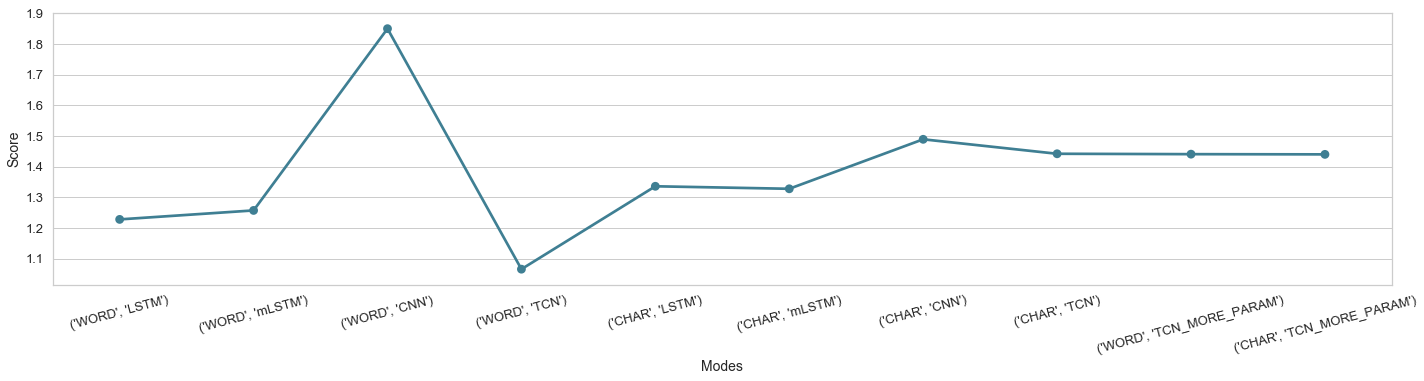

Accuracies:
                    Modes  Accuracy
0            (WORD, LSTM)  0.652502
1           (WORD, mLSTM)  0.651311
2             (WORD, CNN)  0.594519
3             (WORD, TCN)  0.627482
4            (CHAR, LSTM)  0.472994
5           (CHAR, mLSTM)  0.474980
6             (CHAR, CNN)  0.465052
7             (CHAR, TCN)  0.347498
8  (WORD, TCN_MORE_PARAM)  0.347498
9  (CHAR, TCN_MORE_PARAM)  0.347498


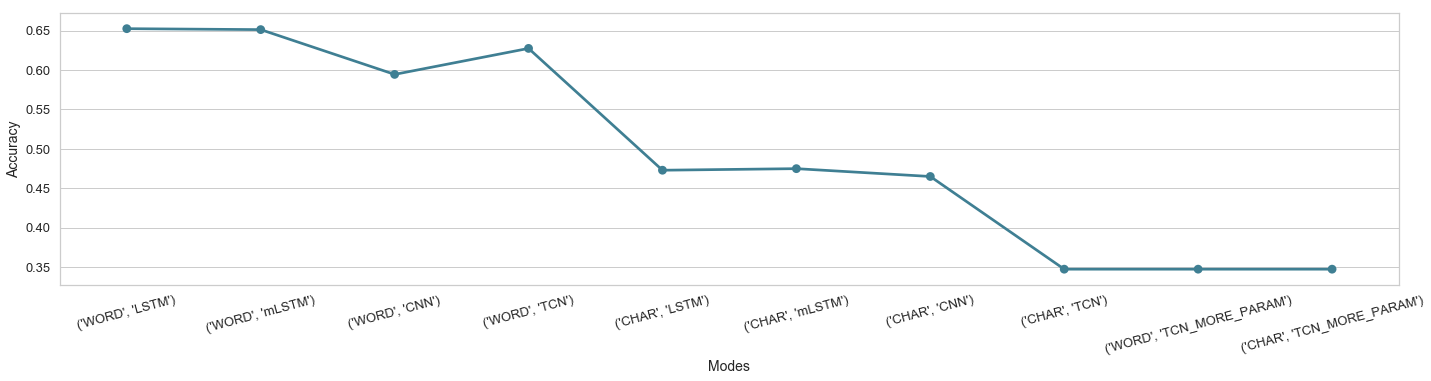

In [25]:
scores.update(scores_tune_tcn)
accs.update(accs_tune_tcn)

cmp_scores_and_accuracies(scores, accs)

Let's also inspecct some outliers where mLSTM has better accuracy than TNN:

In [26]:
# TODO

### Conclusion
TODO.

### Next Steps
1. When acquiring labels with VADER, we can try to apply other strategies instead of using hard-coded threshold.
2. Apply dimmensionality reduction on texts to see if results are better.
3. Apply pre-trained model for embedding.
4. Include emojis and other special characters for character-level training.